In [1]:
from gliderport.preset import notebook_snakemake


In [2]:
rs1_subregion_dict = {
    "MOp": ["MOp-2", "MOp-3"],
    "SSp": ["SSp-3", "SSp-4"],
    "ACA": ["PFC-2", "ACA-1", "ACA-2"],
    "AI": ["AI"],
    "RSP": ["RSP-3", "RSP-4"],
    "AUD": ["AUD-1", "AUD-2"],
    "PTLp": ["PTLp"],
    "VIS": ["VIS-2", "VIS-3"],
    "ENT": ["RHP-1", "RHP-2", "RHP-3", "RHP-5"],
    "CAa": ["CA-i", "CA-ii"],
    "CAp": ["CA-iii", "CA-iv"],
    "DGa": ["DG-1", "DG-2"],
    "DGp": ["DG-3", "DG-4"],
    "PIRa": ["PIR-1", "PIR-2", "PIR-3", "PIR-4"],
    "PIRp": ["PIR-5", "PIR-6", "PIR-7", "PIR-8"],
    "MOB": ["MOB"],
    "AON": ["AON"],
    "PAL": ["PAL-1", "PAL-2", "PAL-3", "GP"],
    "STR": ["CP-1", "CP-2", "CP-3"],
    "AMY": ["AMY-1", "AMY-2", "AMY-3"],
    "THl": ["TH-1", "TH-3"],
    "THm": ["TH-2", "TH-4"],
    "THp": ["TH-5", "TH-6", "TH-7"],
    "HY": ["HY-1", "HY-2", "HY-3", "HY-4"],
    "SC": ["SC-1", "SC-2", "SC-3"],
    "MRN": ["PAG-3", "PAG-4", "MRN"],
    "VTA": ["VTA-1", "VTA-2"],
    "PAG": ["PAG-1", "PAG-2"],
    "IC": ["IC-1"],
    "P": ["PRN-1", "PRN-2", "PRN-3", "PRN-4", "PCG"],
    "MY": ["MY-1", "MY-2", "MY-3", "MY-4"],
}

rs2_subregion_dict = {
    "MOp": ["3C", "4B"],
    "SSp": ["6B", "7B"],
    "ACA": ["3A", "4A", "5A"],
    "AI": ["3D"],
    "RSP": ["9A", "10A"],
    "AUD": ["9D", "10C"],
    "PTLp": ["9B"],
    "VIS": ["11B", "12B"],
    "ENT": ["10D11D12D13B"],
    "CAa": ["8E9H"],
    "CAp": ["10E11E"],
    "DGa": ["8J9J"],
    "DGp": ["10F11F"],
    "PIRa": ["2D3E4F5G"],
    "PIRp": ["6D7D8D9E"],
    "MOB": ["1C"],
    "AON": ["2E"],
    "PAL": ["4H5H6F7F", "6F7F"],
    "STR": ["4D5E6E"],
    "AMY": ["7H8H9G"],
    "THl": ["7E8F"],
    "THm": ["7G8G"],
    "THp": ["9K10G"],
    "HY": ["6H7J8K9L"],
    "SC": ["11G12F13C"],
    "MRN": ["10H11H12H"],
    "VTA": ["10J11J"],
    "PAG": ["12G13D"],
    "IC": ["14A"],
    "P": ["12J13E13F14C14D"],
    "MY": ["15C16C17B18B"],
}

In [3]:
param_list = [f'{xx}-{yy}' for xx in rs1_subregion_dict for yy in ['TF', 'GO', 'NT', 'NP', 'IC']]
print(len(param_list))


155


In [29]:
notebook_snakemake(
    work_dir=f"/home/jzhou_salk_edu/sky_workdir/230322_targetpair_roc_GO/result_new/run/",
    notebook_dir="/home/jzhou_salk_edu/sky_workdir/230322_targetpair_roc_GO/template/",
    groups=param_list,
    default_cpu=1,
    default_mem_gb=5,
    redo_prepare=True,
)


In [4]:
cat_list = ['NP', 'NT', 'IC', 'GO', 'TF', 'ALL']
param_list = [f'{xx}-{cat_list[i]}-{cat_list[j]}' for xx in rs1_subregion_dict for i in range(len(cat_list)-1) for j in range(i+1, len(cat_list))]
print(len(param_list))


465


In [6]:
notebook_snakemake(
    work_dir=f"/home/jzhou_salk_edu/sky_workdir/230322_targetpair_roc_GO/result/run/",
    notebook_dir="/home/jzhou_salk_edu/sky_workdir/230322_targetpair_roc_GO/template/",
    groups=param_list,
    default_cpu=1,
    default_mem_gb=5,
    redo_prepare=True,
)


In [8]:
!pwd

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/home/jzhou_salk_edu/sky_workdir/230322_targetpair_roc_GO


In [1]:
import numpy as np
import pandas as pd
import anndata
from wmb import mm10
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("default")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = "Helvetica"


In [26]:
adata = anndata.read_h5ad(f'/home/jzhou_salk_edu/sky_workdir/230129_targetpair_roc/data_new/MOp_RS2_geneCH.h5ad')
adata


AnnData object with n_obs × n_vars = 2568 × 19012
    obs: 'mCCCFrac', 'mCGFrac', 'mCHFrac', 'FinalmCReads', 'Plate', 'PlateNormCov', 'Sample', 'SubRegion', 'DissectionRegion', 'Target', 'Sex', 'L1', 'L2', 'L3', 'L4', 'L1_annot', 'PassTargetFilter'
    var: 'chrom', 'end', 'start'
    obsm: 'X_pca'

In [3]:
print('TF')
selg = mm10.get_tf_gene_ids().drop_duplicates()
print(len(selg))


TF
1838


In [8]:
np.savetxt('/rs2/genelist/TF.txt', selg.map(mm10.gene_id_to_name).sort_values(), fmt='%s', delimiter='\n')

In [24]:
print('TF')
selg = mm10.get_tf_gene_ids().drop_duplicates()
print(len(selg))
selg = adata.var.index.isin(selg)
print(selg.sum())

print('NT')
selg = pd.read_csv('/rs2/genelist/NTReceptor_Tasic.txt', header=None, index_col=0)
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('IC')
selg = pd.concat([pd.read_csv('/rs2/genelist/IC.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/IC_Tasic.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('NP')
selg = pd.concat([pd.read_csv('/rs2/genelist/NPP-Receptor_Smith.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/NPP-Receptor_Tasic.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('GO')
selg = pd.concat([pd.read_csv('/rs2/genelist/GO0050808_SynapseOrganization.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/GO0031175_NeuronProjectionDevelopment.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())


TF
1838
666
NT
112
61
IC
423
183
NP
91
19
GO
1137
628


In [27]:
print('TF')
selg = mm10.get_tf_gene_ids().drop_duplicates()
print(len(selg))
selg = adata.var.index.isin(selg)
print(selg.sum())

print('NT')
selg = pd.read_csv('/rs2/genelist/NTReceptor_Tasic.txt', header=None, index_col=0)
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('IC')
selg = pd.concat([pd.read_csv('/rs2/genelist/IC.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/IC_Tasic.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('NP')
selg = pd.concat([pd.read_csv('/rs2/genelist/NPP-Receptor_Smith.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/NPP-Receptor_Tasic.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())

print('GO')
selg = pd.concat([pd.read_csv('/rs2/genelist/GO0050808_SynapseOrganization.txt', header=None, index_col=0), pd.read_csv('/rs2/genelist/GO0031175_NeuronProjectionDevelopment.txt', header=None, index_col=0)]).drop_duplicates()
print(len(selg))
selg = adata.var.index.map(mm10.gene_id_to_name).isin(selg.index)
print(selg.sum())


TF
1838
1322
NT
112
92
IC
423
267
NP
91
34
GO
1137
821


In [9]:
result = []
for i in range(len(cat_list)-1):
    xx = cat_list[i]
    data = []
    for reg in rs1_subregion_dict.keys():
        tmp = pd.read_hdf(f'result/{reg}-{xx}-comprep_mean.hdf', key='data')
        nt = tmp.shape[0]
        idx = np.triu_indices(nt, k=1)
        data.append(pd.DataFrame(tmp.values[idx], index=reg+'-'+tmp.index[idx[0]]+'/'+tmp.columns[idx[1]]))
    data = pd.concat(data, axis=0)
    data.columns = [xx]
    result.append(data)
    for j in range(i+1, len(cat_list)):
        yy = cat_list[j]
        data = []
        for reg in rs1_subregion_dict.keys():
            tmp = pd.read_hdf(f'result/{reg}-{xx}-{yy}_mean.hdf', key='data')
            nt = tmp.shape[0]
            idx = np.triu_indices(nt, k=1)
            data.append(pd.DataFrame(tmp.values[idx], index=reg+'-'+tmp.index[idx[0]]+'/'+tmp.columns[idx[1]]))
        data = pd.concat(data, axis=0)
        data.columns = [f'{xx}-{yy}']
        result.append(data)

data = []
for reg in rs1_subregion_dict.keys():
    tmp = pd.read_hdf(f'/home/jzhou_salk_edu/sky_workdir/230129_targetpair_roc/result/{reg}-geneCH-X-comprep_mean.hdf', key='data')
    nt = tmp.shape[0]
    idx = np.triu_indices(nt, k=1)
    data.append(pd.DataFrame(tmp.values[idx], index=reg+'-'+tmp.index[idx[0]]+'/'+tmp.columns[idx[1]]))

data = pd.concat(data, axis=0)
data.columns = ['ALL']
result.append(data)

result = pd.concat(result, axis=1)
result


,NP,NP-NT,NP-IC,NP-GO,NP-TF,NP-ALL,NT,NT-IC,NT-GO,NT-TF,...,IC,IC-GO,IC-TF,IC-ALL,GO,GO-TF,GO-ALL,TF,TF-ALL,ALL
MOp-SSp/ACA,0.568196,0.604215,0.592283,0.606921,0.573739,0.569098,0.616635,0.605403,0.627749,0.610500,...,0.608683,0.635846,0.616132,0.597272,0.660286,0.639188,0.623678,0.636014,0.625965,0.746285
MOp-SSp/AI,0.654231,0.630061,0.599197,0.643470,0.634181,0.624161,0.698775,0.651178,0.711345,0.689527,...,0.676402,0.782838,0.735193,0.719496,0.865585,0.817367,0.801651,0.833954,0.805891,0.926386
MOp-SSp/AUDp,0.873411,0.884861,0.874842,0.886805,0.829240,0.823838,0.946522,0.931303,0.943191,0.908411,...,0.959114,0.974334,0.956793,0.951750,0.989107,0.983238,0.979810,0.983886,0.980279,0.992877
MOp-SSp/STR,0.597429,0.544960,0.558670,0.550977,0.551038,0.548788,0.564327,0.581435,0.585556,0.585171,...,0.586811,0.612532,0.604706,0.593332,0.638587,0.650589,0.618539,0.646629,0.620450,0.749251
MOp-SSp/TH,0.909365,0.893496,0.890804,0.889931,0.861947,0.858311,0.930314,0.932852,0.934123,0.922114,...,0.943481,0.950680,0.945495,0.938356,0.963167,0.960371,0.955162,0.960834,0.956019,0.976763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MY-HY/CBN,0.691657,0.732694,0.740125,0.739391,0.678206,0.670627,0.811247,0.814932,0.807182,0.743103,...,0.868745,0.849673,0.809028,0.789278,0.902884,0.890609,0.871206,0.889755,0.874552,0.937614
MY-HY/CBX,0.761921,0.881633,0.876282,0.865324,0.812279,0.813204,0.919604,0.913853,0.919229,0.886192,...,0.932552,0.946147,0.923689,0.923211,0.966582,0.950592,0.953517,0.952293,0.954513,0.973728
MY-SC/CBN,0.753748,0.765903,0.780444,0.794593,0.757877,0.747638,0.837376,0.854654,0.859259,0.829987,...,0.909555,0.907133,0.896088,0.874023,0.952718,0.947329,0.928020,0.947833,0.930465,0.963952
MY-SC/CBX,0.791497,0.889153,0.877086,0.879760,0.834494,0.842466,0.920195,0.915053,0.929228,0.903768,...,0.929881,0.952334,0.938846,0.934194,0.970184,0.960526,0.956576,0.960406,0.957368,0.973119


In [14]:
result.mean()

TF     0.869763
GO     0.882308
IC     0.827329
NP     0.727259
NT     0.798277
ALL    0.913429
dtype: float64

In [31]:
result.mean()

TF     0.874988
GO     0.880669
IC     0.824164
NP     0.722454
NT     0.790189
ALL    0.913429
dtype: float64

In [88]:
result.mean()

NP        0.727259
NP-NT     0.751299
NP-IC     0.743049
NP-GO     0.753936
NP-TF     0.719584
NP-ALL    0.716375
NT        0.798277
NT-IC     0.789562
NT-GO     0.802461
NT-TF     0.775405
NT-ALL    0.769742
IC        0.827329
IC-GO     0.841632
IC-TF     0.820759
IC-ALL    0.814148
GO        0.882308
GO-TF     0.867684
GO-ALL    0.863430
TF        0.869763
TF-ALL    0.865440
ALL       0.913429
dtype: float64

In [89]:
result.columns

Index(['NP', 'NP-NT', 'NP-IC', 'NP-GO', 'NP-TF', 'NP-ALL', 'NT', 'NT-IC',
       'NT-GO', 'NT-TF', 'NT-ALL', 'IC', 'IC-GO', 'IC-TF', 'IC-ALL', 'GO',
       'GO-TF', 'GO-ALL', 'TF', 'TF-ALL', 'ALL'],
      dtype='object')

In [90]:
result = result[['NP-ALL', 'NP-TF', 'NP', 'NP-IC', 'NP-NT', 'NP-GO', 
                 'NT-ALL', 'NT-TF', 'NT-IC', 'NT', 'NT-GO', 
                 'IC-ALL', 'IC-TF', 'IC', 'IC-GO', 
                 'GO-ALL', 'GO-TF', 'GO', 
                 'TF-ALL', 'TF', 'ALL']]

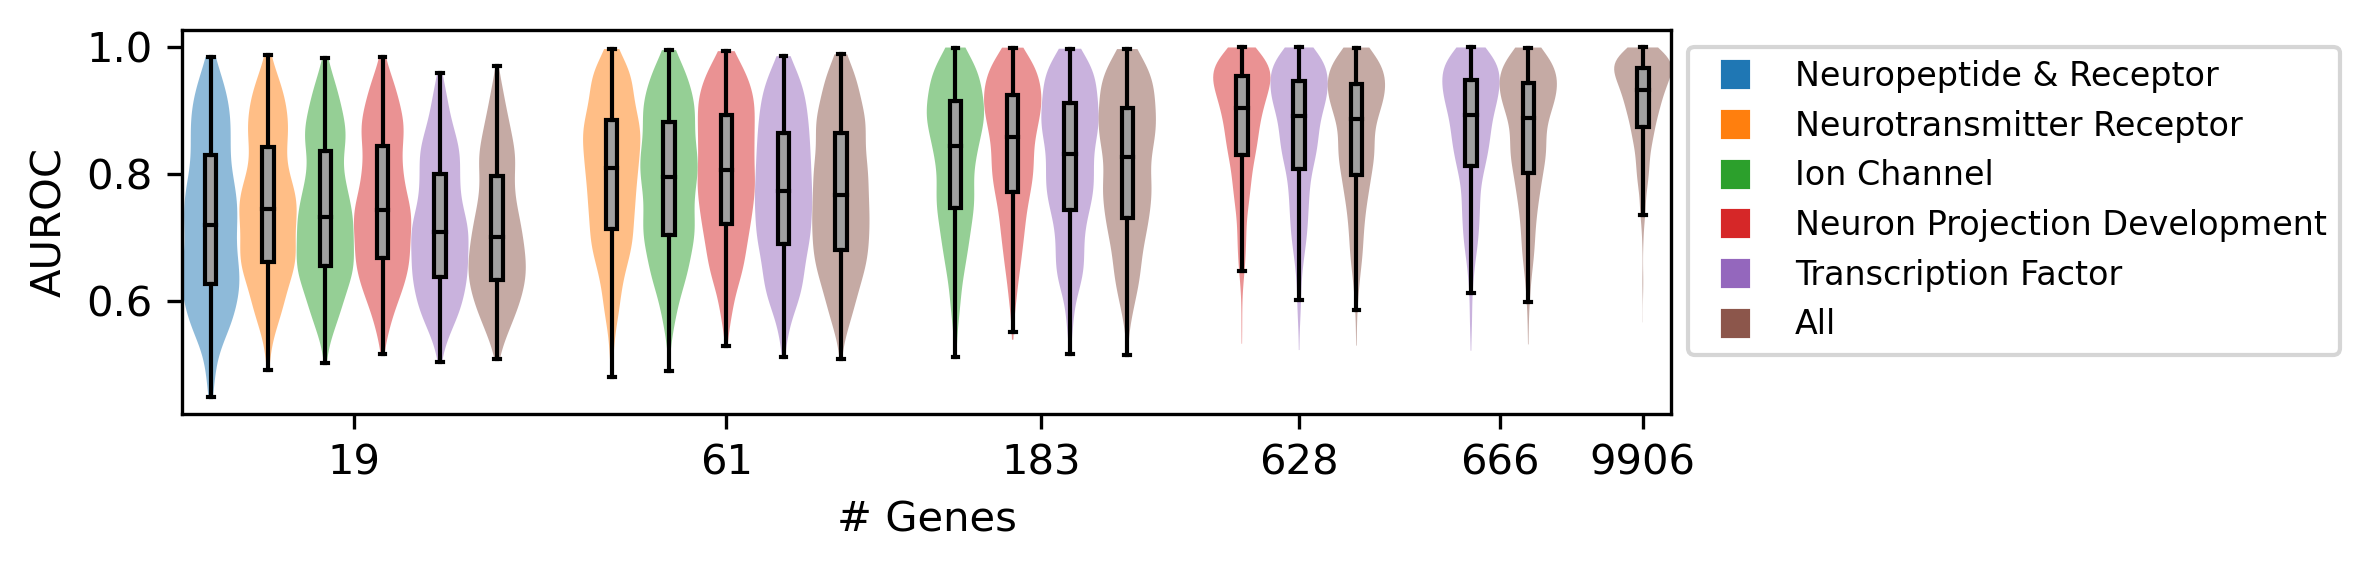

In [85]:
xpos = [0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,18,19,20,22,23,25]
palette = {'NP':'C0', 'NT':'C1', 'IC':'C2', 'GO':'C3', 'TF':'C4', 'ALL':'C5'}
count = [19, 61, 183, 628, 666, 9906]
color = result.columns.str.split('-').str[-1].map(palette)
fig, ax = plt.subplots(figsize=(8,2), dpi=300)
plot = ax.violinplot(dataset=result, positions=xpos, widths=1, showextrema=False, bw_method='scott')
for p, c in zip(plot['bodies'], color):
    p.set_facecolor(c)
    p.set_alpha(0.5)
    
plot = ax.boxplot(result, positions=xpos, showfliers=False, widths=0.2, patch_artist=True, medianprops={'color':'k'})
for p in plot['boxes']:
    p.set_facecolor('#a0a0a0')
    
# ax.set_xticks(xpos)
# ax.set_xticklabels(result.columns, rotation=90)
ax.set_xticks([2.5, 9, 14.5, 19, 22.5, 25])
ax.set_xticklabels(count)
ax.set_xlabel('# Genes')
ax.set_ylabel('AUROC')

markers = [
    plt.Line2D([0, 0], [0, 0], color=color, marker="s", linestyle="")
    for color in palette.values()
]

ax.legend(
    markers, ['Neuropeptide & Receptor', 'Neurotransmitter Receptor', 'Ion Channel', 'Neuron Projection Development', 'Transcription Factor', 'All'], fontsize=8, numpoints=1, bbox_to_anchor=(1, 1), loc="upper left"
)

plt.tight_layout()
plt.savefig('genecategory_AUROC.pdf', transparent=True)


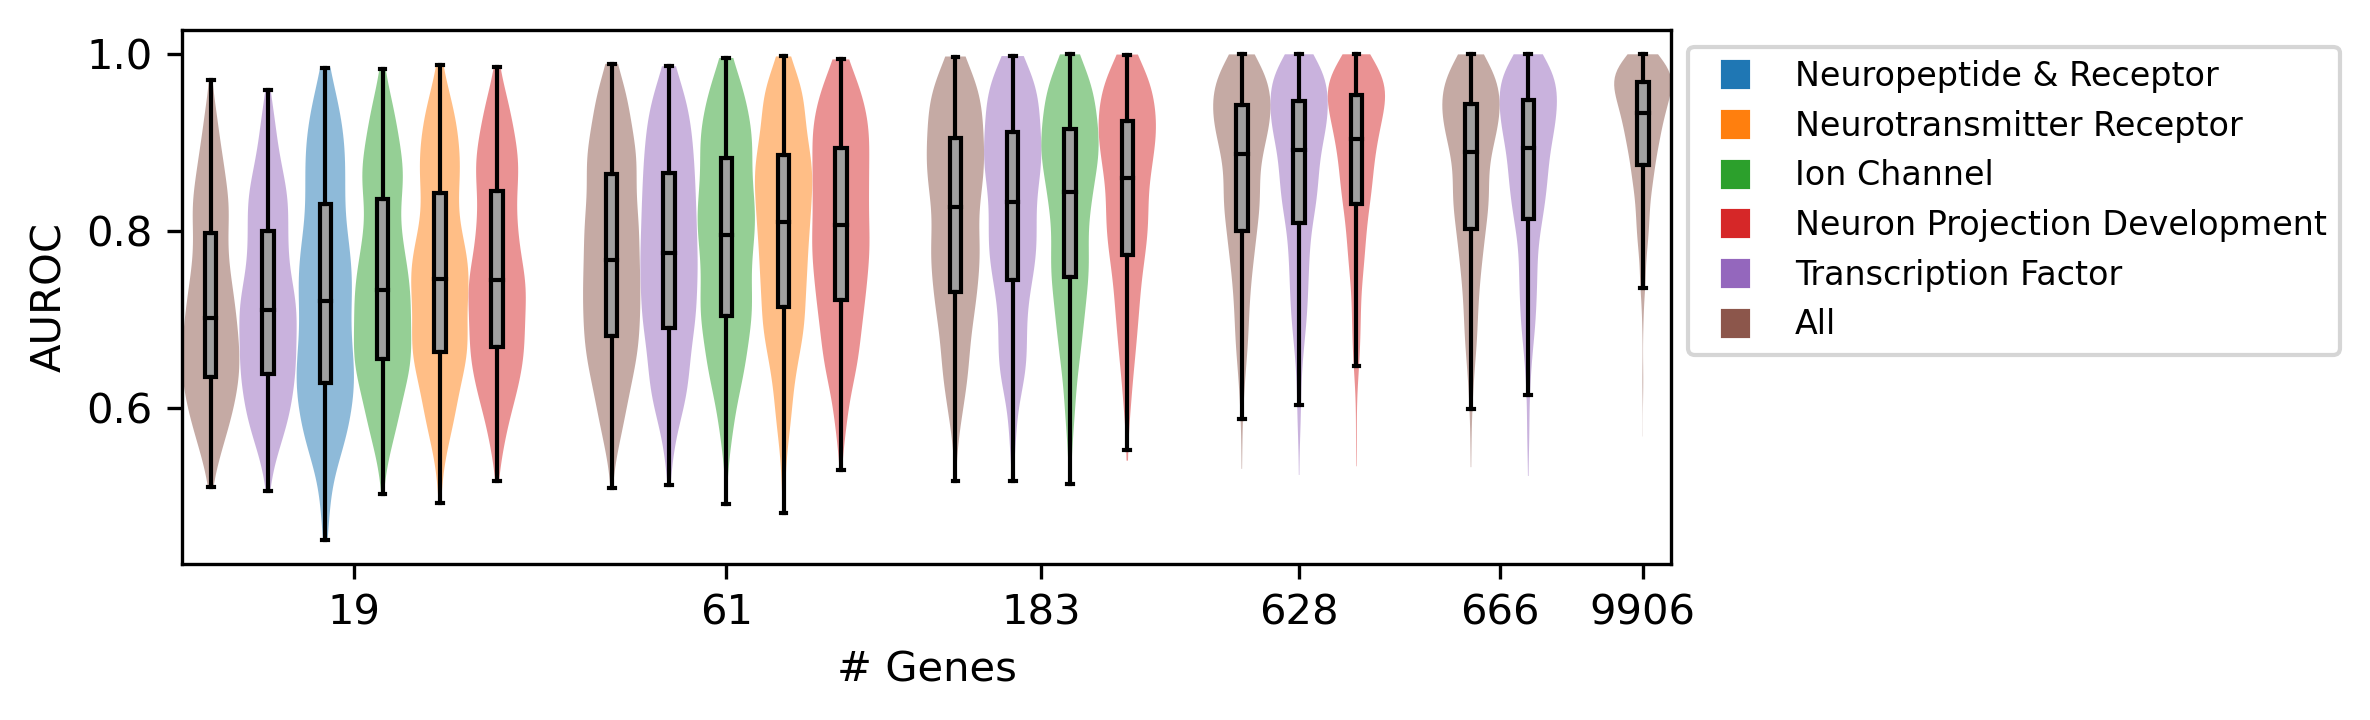

In [92]:
xpos = [0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,18,19,20,22,23,25]
palette = {'NP':'C0', 'NT':'C1', 'IC':'C2', 'GO':'C3', 'TF':'C4', 'ALL':'C5'}
count = [19, 61, 183, 628, 666, 9906]
color = result.columns.str.split('-').str[-1].map(palette)
fig, ax = plt.subplots(figsize=(8,2.5), dpi=300)
plot = ax.violinplot(dataset=result, positions=xpos, widths=1, showextrema=False, bw_method='scott')
for p, c in zip(plot['bodies'], color):
    p.set_facecolor(c)
    p.set_alpha(0.5)
    
plot = ax.boxplot(result, positions=xpos, showfliers=False, widths=0.2, patch_artist=True, medianprops={'color':'k'})
for p in plot['boxes']:
    p.set_facecolor('#a0a0a0')
    
# ax.set_xticks(xpos)
# ax.set_xticklabels(result.columns, rotation=90)
ax.set_xticks([2.5, 9, 14.5, 19, 22.5, 25])
ax.set_xticklabels(count)
ax.set_xlabel('# Genes')
ax.set_ylabel('AUROC')

markers = [
    plt.Line2D([0, 0], [0, 0], color=color, marker="s", linestyle="")
    for color in palette.values()
]

ax.legend(
    markers, ['Neuropeptide & Receptor', 'Neurotransmitter Receptor', 'Ion Channel', 'Neuron Projection Development', 'Transcription Factor', 'All'], fontsize=8, numpoints=1, bbox_to_anchor=(1, 1), loc="upper left"
)

plt.tight_layout()
plt.savefig('genecategory_AUROC.pdf', transparent=True)
